<h1>Chapter 3 | Under the Hood Study | <b>Size of Japanese Cities</b></h1>
<p>In this notebook, I'll replicate the author's code on how to reproduce an example of log rank-log value plot for a power-law distribution; in this case, the subject is the size of Japanese cities. Also known as the <b>scale-free distribution</b> the <b>power-law distribution</b> is very specific, as it deals with distributions with <i>very large</i> extreme values.</p>
<h2><b>PART A</b> | Read the data</h2>

In [2]:
import os
import sys
import numpy as np
import pandas as pd
from plotnine import *

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Get current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# Get location folders
data_in = f"{dirname}da_data_repo/city-size-japan/clean/"
data_out = f"{dirname}da_case_studies/ch03-city_size_japan/"
output = f"{dirname}da_case_studies/ch03-city_size_japan/output/"
func = f"{dirname}da_case_studies/ch00-tech_prep/"
sys.path.append(func)

In [4]:
# Import the prewritten helper functions
from py_helper_functions import  *

In [5]:
city_size = pd.read_csv(f"{data_in}city-size-japan.csv")

In [7]:
# Create variables
city_size["pop"] = city_size["pop_2015"] / 1000
city_size["lnpop"] = np.log(city_size["pop"])
city_size = city_size.sort_values(by="pop", ascending=False).reset_index(drop=True)
city_size["rank"] = [x for x in range(1, len(city_size["pop"]) + 1)]


In [8]:
city_size

,Name,pop_1995,pop_2000,pop_2005,pop_2010,pop_2015,pop,lnpop,rank
0,T?ky? [Tokyo],7967614,8134688,8489653,8945695,9272740,9272.740,9.134834,1
1,Yokohama,3307136,3426651,3579628,3688773,3724844,3724.844,8.222780,2
2,?saka [Osaka],2602421,2598774,2628811,2665314,2691185,2691.185,7.897737,3
3,Nagoya,2152184,2171557,2215062,2263894,2295638,2295.638,7.738766,4
4,Sapporo,1757025,1822368,1880863,1913545,1952356,1952.356,7.576792,5
...,...,...,...,...,...,...,...,...,...
154,Kawanishi,144539,153762,157668,156423,156375,156.375,5.052257,155
155,Hitachinaka (Katsuta),146750,151673,153639,157060,155689,155.689,5.047860,156
156,Noda,152245,151197,151240,155491,153583,153.583,5.034241,157
157,Sayama,162240,161460,158074,155727,152405,152.405,5.026541,158


In [9]:
# Get ln(rank) vs ln(x)

city_size["lnrank"] = np.log(city_size["rank"])

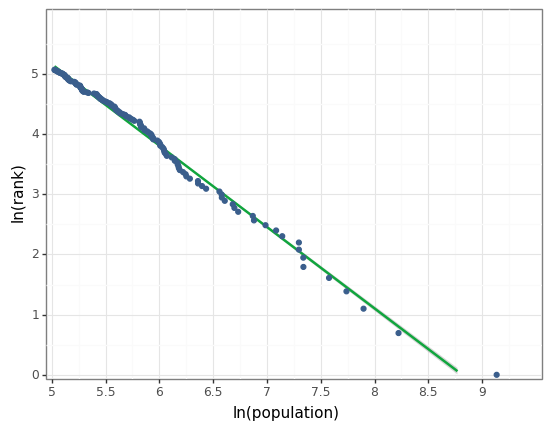

<ggplot: (101056257352)>

In [12]:
ggplot(city_size, aes(x="lnpop", y="lnrank")) + geom_smooth(
    color=color[1], method="lm"
) + geom_point(color=color[0]) + labs(
    x="ln(population)", y="ln(rank)"
) + scale_y_continuous(
    expand=(0.01, 0.01), limits=(0, 6), breaks=seq(0, 6, by=1)
) + scale_x_continuous(
    expand=(0.01, 0.01), limits=(5, 9.5), breaks=seq(5, 9.5, by=0.5)
) + theme_bw()

In [13]:
# Get scale invariance
x1 = 200
x2 = 300
bound = 0.2

In [17]:
city_size.query("pop >= @x1*(1-@bound)  & pop <= @x1*(1+@bound)").shape[0]


56